# Chapter5: 潜在変数

この章では混合ガウス分布についての解説と実装を通して、潜在変数について学ぶ。<br>
そして、混合ガウス分布のパラメータ推定と関係の深いk-means法を取り扱ったのちに、混合ガウス分布について詳しい説明を行っていく。

# 5.1 潜在変数

### 5.1.1 潜在変数とは

潜在変数は実際に観測されることはないが、データを決定づける上で重要な変数のことを指す。<br>
例えば、学生の学力を図るために「国語」、「数学」、「理科」、「社会」のテストを実施したとしよう。<br>
この場合、５教科のテストの点数が観測変数であり、生徒がどの科目が得意なのかを表現する実際に観測できるデータである。<br>
そして、点数を見てみると数学が得意な生徒は理科も得意であったり、国語が得意な生徒は社会も得意であったりという傾向がみられることがある。<br>
このとき、数学や理科の点数には学生の「理系的能力」、国語や社会には学生の「文系的能力」という実際に測定できない能力が関係するのかもしれない。<br>
このような実際には観測できないが観測データに影響を与えている変数を潜在変数と呼ぶ。<br>
<img src="attachment:%E5%9B%B3-2.png" width="400px">
そして、本章では観測データを用いることで潜在変数を推定するモデルについて取り扱っていく。<br>
（例でいえば、テストの点数から「理系的能力」と「文系的能力」を推定するということである）

### 5.1.2 混合ガウス分布における潜在変数

今回学ぶ潜在変数モデルは混合ガウス分布である。<br>
混合ガウス分布ではデータが複数のガウス分布の合成であるとみなして、データの分布を求めるモデルである。<br>
このとき、各データがどのガウス分布から生成されたものなのかということが潜在変数となる。<br>
例えば、下の図のような人間の身長を考えよう。([出典](https://www.google.com/url?sa=i&url=https%3A%2F%2Fstatresearch.jp%2FBMI%2F&psig=AOvVaw2hy059Ws0tKUdnFTl8aDT9&ust=1687502895983000&source=images&cd=vfe&ved=0CBMQjhxqFwoTCICFk6Kk1v8CFQAAAAAdAAAAABAE))<br>
身長は男女で差があるものであるが、男性の身長と女性の身長を分けて考えればそれぞれガウス分布に従う。<br>
そのため、人間の身長の分布=男性の身長の分布+女性の身長の分布であるといえる。<br>
そして、今回の場合における観測変数はAさんの身長であり、潜在変数はAさんの性別ということになる。
<img src="attachment:distribution_17.svg" width="500px">

# 5.2 k-means法

k-means法の目的は、データをk個のグループに分割する方法である。<br>

グループが３つ(k=3)の場合、以下のデータでは、青・赤・緑に分類することができると考えられる。<br>

「同じクラスに属するデータ点は似ている」という仮定に基づき、距離の近いデータ点を同じクラスに分類することが主な考え方だ。<br>
各クラスの代表地点は上の図でいう印スター。<br>
各データ点は、代表地点との距離の近さを基準として、各クラスに分類される。<br>

### 5.2.1 k-means法の定式化
次に、k-means法の式について見ていこうと思う。

目的関数：<br>
$$
J = \sum_{n=1}^N \sum_{k=1}^K r_{nk} || \mathbf{x}_n - \mathbf{\mu}_k  ||^2 \tag{1}
$$

$\mathbf{x}_n$：n番目のデータ点<br>
$\mu_k$：k番目のクラスターの重心点(代表地点)<br>
2値指示変数：$r_{nk} \in \{0 , 1\}$<br>
2値指示変数とは、データ点$\mathbf{x}_n$がクラスタkに属されるとき1を、そうでなければ0を割り当てる指示変数<br>

目的関数Jを最小になるような$r_{nk}$と$\mu_k$の値を求めることで、最適なクラスタリングができる仕組みになっている。<br>
初めから各クラスの代表地点がわかるはずが無い。<br>
よってk-means法のアルゴリズムは、以下のような流れで目的関数Jを最小にするような$r_{nk}$と$\mu_k$の値の決定するようになっている。

### 5.2.2 k-means法のアルゴリズムの流れ
**1.重心点$\mu_k$の初期値を決定する。**

**2.重心点$\mu_k$を固定しつつ、$r_{nk}$について、目的関数Jを最小化する。**<br>

これは、n番目のデータ点と各クラスの重心点$\mu_k$との距離を求めて、n番目のデータ点を最も距離の近いクラスの重心点に割り当てることである。<br>

$$
r_{nk}=  \left\{
\begin{array}{ll}
1 & k = \text{argmin}_j|| \mathbf{x}_n - \mathbf{\mu}_k  ||^2 \\
0
\end{array}
\right.
$$

**3.$r_{nk}$を固定しつつ、重心点$\mu_k$について目的関数Jを最小化する。**<br>

これは、k番目のクラスに割り当てられたすべてのデータ点$\mathbf{x}_n$の平均値をとり、新しくk番目のクラスの重心点$\mu_k$を決定することである。

$\mu_k$の決定を式で見てみる。<br>
$\mu_k$に関する偏微分を0とおくと、以下の通りになる。
$$
2\sum_{n=1}^N r_{nk}(\mathbf{x}_n - \mathbf{\mu}_k) = 0
$$
$$
\mathbf{\mu}_k = \frac{\sum_{n=1}^N r_{nk}\mathbf{x}_n }{\sum_{n=1}^N r_{nk}}
$$
最後の式を見ると、k番目のクラスに割り当てられたすべてのデータ点$\mathbf{x}_n$の平均値であると解釈が可能である。

**4.目的関数Jが収束するまで、2と3を繰り返し計算する**

### 5.2.3 sk-learnで実装

### データセットの準備

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets

In [35]:
# ワインデータのダウンロード
wine = datasets.load_wine()
data = pd.DataFrame(wine.data, columns=wine.feature_names)
target = pd.DataFrame(wine.target, columns=["class"])

df = pd.concat([data, target], axis=1)

df.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [47]:
X = df[["color_intensity","proline"]]
y = wine.target

X.head(5)

,color_intensity,proline
0,5.64,1065.0
1,4.38,1050.0
2,5.68,1185.0
3,7.80,1480.0
4,4.32,735.0


In [37]:
# 特徴量の標準化
sc = StandardScaler()
X_std = sc.fit_transform(X)

In [38]:
#k-means法で必要なライブラリ
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [51]:
# K-Meansのモデルを作成
model2 = KMeans(n_clusters=2, random_state=7)
model3 = KMeans(n_clusters=3, random_state=7)
model4 = KMeans(n_clusters=4, random_state=7)

#モデルの訓練
model2.fit(X_std)
model3.fit(X_std)
model4.fit(X_std)

KMeans(n_clusters=4, random_state=7)

<function matplotlib.pyplot.show(close=None, block=None)>

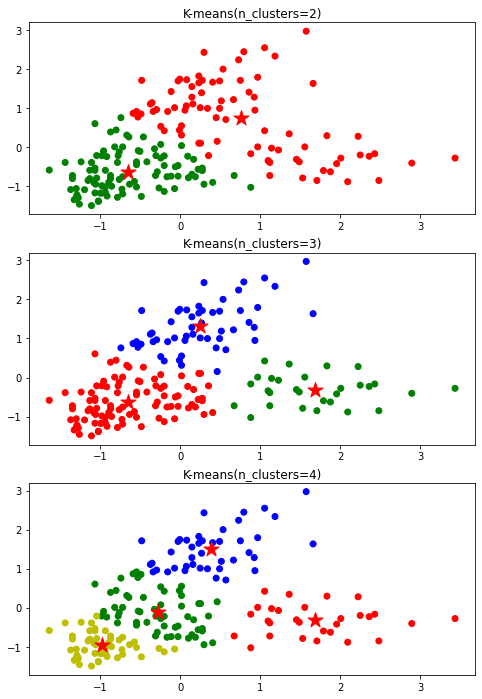

In [56]:
plt.figure(figsize=(8,12)) #プロットのサイズ指定

color2 = np.array(['r','g'])
color3 = np.array(['r','g','b'])
color4 = np.array(['r','g','b','y'])
# クラスタ数2のK-Meansの散布図
plt.subplot(3, 1, 1)
plt.scatter(X_std[:,0], X_std[:,1], c=color2[model2.labels_])
plt.scatter(model2.cluster_centers_[:,0], model2.cluster_centers_[:,1],s=250, marker='*',c='red')
plt.title('K-means(n_clusters=2)')

# クラスタ数3のK-Meansの散布図
plt.subplot(3, 1, 2)
plt.scatter(X_std[:,0], X_std[:,1], c=color3[model3.labels_])
plt.scatter(model3.cluster_centers_[:,0], model3.cluster_centers_[:,1],s=250, marker='*',c='red')
plt.title('K-means(n_clusters=3)')

# クラスタ数4のK-Meansの散布図
plt.subplot(3, 1, 3)
plt.scatter(X_std[:,0], X_std[:,1], c=color4[model4.labels_])
plt.scatter(model4.cluster_centers_[:,0], model4.cluster_centers_[:,1],s=250, marker='*',c='red')
plt.title('K-means(n_clusters=4)')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

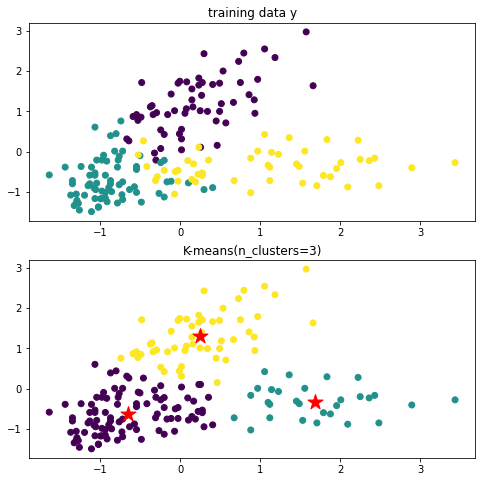

In [53]:
plt.figure(figsize=(8,8)) #プロットのサイズ指定

# 色とプロリンの散布図
plt.subplot(2, 1, 1)
plt.scatter(X_std[:,0], X_std[:,1],c=y)
plt.title('training data y')

# K-Meansの散布図
plt.subplot(2, 1, 2)
plt.scatter(X_std[:,0], X_std[:,1], c=model3.labels_)
plt.scatter(model3.cluster_centers_[:,0], model3.cluster_centers_[:,1],s=250, marker='*',c='red')
plt.title('K-means(n_clusters=3)')

plt.show

## 5.3 混合ガウス分布

### 5.3.1 ガウス分布
ガウス分布は、平均$\mu$と分散$\sigma$のパラメータを指定することで、分布の形状を決めることができる確率分布である。<br>

以下では、平均$\mu=0$、分散$\sigma=1$とした時のガウス分布である。

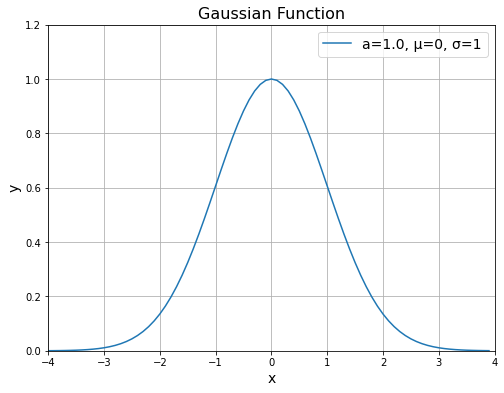

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# ガウス関数
def gauss(x, a=1, mu=0, sigma=1):
    return a * np.exp(-(x - mu)**2 / (2*sigma**2))

x = np.arange(-4, 4, 0.1)
f = gauss(x)

# Figureを作成
fig = plt.figure(figsize=(8, 6))

ax = fig.add_subplot(111)
ax.set_title("Gaussian Function", fontsize=16)
ax.set_xlabel("x", fontsize=14)
ax.set_ylabel("y", fontsize=14)
ax.grid()
ax.set_xlim([-4, 4])
ax.set_ylim([0, 1.2])

f1 = gauss(x)

# Axesにガウス関数を描画
ax.plot(x, f, label="a=1.0, μ=0, σ=1")
ax.legend(fontsize=14)
plt.show()

### 5.3.2 混合ガウス分布とは

例えば、ワインデータは、以下の図のように単一のガウス分布で表されているとは考えられない。<br>
ワインデータは、k-means法でも見たようにいくつかのクラスタから構成されている。それぞれのクラスタはガウス分布に基づいていると仮定すると、ワインデータは単一のガウス分布が複数混合した分布と表すことができる。<br>

このように、単一のガウス分布よりも、より豊かな確率密度のモデルを提供することが、混合ガウス分布の意図である。

### 5.3.3 混合ガウス分布の定義
ここでは、離散的な潜在変数zを用いた混合ガウス分布を定式化したいと思う。

混合ガウス分布は、ガウス分布の線形重ね合わせで表すことができ、以下の式となっている。
$$
p(\mathbf{x})= \sum_{k=1}^K \pi_k N(\mathbf{x}|\mathbf{\mu}_k,\mathbf{\sum}_k) \tag{1,1}
$$

ここで、K次元の２値確率変数の$\mathbf{z}$を導入する。
$\mathbf{z}$は、1-of-k符号化法(どれか1つの$z_k$だけが1で、それ以外が0)を取り、以下を満たす。

$$
z_{k} \in \{0 , 1\}
$$
$$
\sum_{k} z_{k} = 1
$$

次に、潜在変数$\mathbf{z}$を用いて、同時分布$p(\mathbf{x},\mathbf{z})$を定義したい。<br>
$p(\mathbf{x},\mathbf{z})=p(\mathbf{x}|\mathbf{z})p(\mathbf{z})$より、同時分布を得るためには、条件付き分布$p(\mathbf{x}|\mathbf{z})$と周辺分布$p(\mathbf{z})$が分かれば良いので、それぞれについて定義していく。

周辺分布$p(\mathbf{z})$は、以下のように混合係数$\pi_k$によって定められる。

$$
p(z)=\Pi_{k=1}^K\pi_k^{z_k} \tag{1,2}
$$

ただし、パラメータ$\pi_k$は、確率であるための制約として以下を満たさなければならない。

$$
0\leqq\pi_k\leqq1
$$
$$
\sum_{k=1}^{K}\pi_k=1
$$


同様に、潜在変数$\mathbf{z}$が与えられた下での$\mathbf{x}$の条件付き分布は次のガウス分布になる。
$$
p(\mathbf{x}|\mathbf{z})=\Pi_{k=1}^{K}N(\mathbf{x}|\mathbf{\mu}_k,\sum_k)^{zk} \tag{1,3}
$$

$p(\mathbf{x})=\sum_zp(\mathbf{x},\mathbf{z})=\sum_zp(\mathbf{x}|\mathbf{z})p(\mathbf{z})$に(1,2)(1,3)を代入すると、
$$
p(\mathbf{x})=\sum_zp(\mathbf{x}|\mathbf{z})p(\mathbf{z})= \sum_{k=1}^K \pi_k N(\mathbf{x}|\mathbf{\mu},\mathbf{\sum}_k) 
$$

これは、(1,1)の混合ガウス分布と同じ式となるため、各観測データ点に対応する潜在変数が存在することが確認できた。

### 5.3.4 負担率

ベイズの定理より、$\mathbf{z}$の事後分布を算出することができる。
つまり、観測されたデータ$\mathbf{x}$から$\mathbf{z}$の分布を見直すことができるということである。
$$
\gamma(z_{nk}) \equiv p(z_k=1|\mathbf{x}) =  \frac{ \pi_k  \mathcal{N} \left( x_n| \mu _k , \Sigma _k \right)}{ \sum_j \pi_j  \mathcal{N} \left( x_n| \mu _j , \Sigma _j \right)   }
$$


この事後分布は、$\gamma(z_k)$とおき、負担率と呼ばれ、n番目のデータが各クラスタkへ所属する確率を表したものである。

### 5.3.4 混合ガウス分布に最尤推定を適用

観測したデータ集合　に混合ガウス分布を当てはめる問題を考える。
この時の対数尤度関数は以下のように定義することができる。

$$\begin{eqnarray} \text{ln}p(X|\pi,\mu,\sum) = \text{ln} \prod _n\big\{ \sum_k \pi _k \mathcal{N}\left( x_n |\mu _k , \Sigma _k \right)\big\} \\
= \sum _n \text{ln}\big\{\sum_k \pi _k \mathcal{N}\left( x_n |\mu _k , \Sigma _k \right)\big\}  \end{eqnarray}
$$
<br>
この対数尤度関数を最大化を行っていきたいが、log-sum部分があり、解析的には解くことが困難であるため、潜在変数を持つモデルの最尤推定を求めるための強力な方法として、EMアルゴリズムを用いる。


### 5.3.5 混合ガウス分布のEMアルゴリズム
EMアルゴリズムはデータから分布のパラメータを推定する有名なアルゴリズムで，混合ガウス分布のパラメータ推定でもよく用いられる．<br>
中身については以下の通りである．<br>

1. $ \pi , \mu , \Sigma$を初期化する
2. [Eステップ]以下の式を計算する<br>
>$ \gamma(z_{nk}) =  \frac{ \pi_k  \mathcal{N} \left( x_n| \mu _k , \Sigma _k \right)}{ \sum_j \pi_j  \mathcal{N} \left( x_n| \mu _j , \Sigma _j \right)   }$<br>
>$ \\N_k = \sum_n \gamma (z_{nk} )$<br>
3. [Mステップ]パラメータの更新を行う<br>
>$L= \sum_n \log \sum_k \pi _k  \mathcal{N} \left( x_n | \mu _k , \Sigma _k \right)$<br>
>$\mu _k  =  \frac{ \sum_{n} \gamma (z_{nk}) x_n }{N_k}$<br>
>$ \Sigma _k = \frac{1}{N_k} \sum_n   \gamma (z_{nk} ) (x_n -\mu_k ) (x_n - \mu _k ) ^{T}$<br>
>$ \pi_ k =\frac{N_k } {N}$
4. 2，3を収束するまで繰り返す

このアルゴリズムも数式だらけで難しく感じるが，実は先ほど学んだKmeans法と非常に類似したアルゴリズムである．<br>
EMアルゴリズムでは与えられたデータ点がどのガウス分布から生成されたものかを推定している．<br>

## 5.4 sk-leanで実装

In [11]:
# ライブラリのインポート
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.mixture import BayesianGaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

In [12]:
# ワインデータのダウンロード
wine = datasets.load_wine()
X = wine.data[:,[9,12]]
y = wine.target

# 特徴量の標準化
sc = StandardScaler()
X_std = sc.fit_transform(X)

In [15]:
# covariance_typeに'diag'を指定しGMMのモデルを作成
model = GaussianMixture(n_components=3, covariance_type='diag', random_state=1)

#モデルの訓練
model.fit(X_std)

# covariance_typeに'full'を指定し GMMのモデルを作成
model2 = GaussianMixture(n_components=3, covariance_type='full', random_state=1)

#モデルの訓練
model2.fit(X_std)

GaussianMixture(n_components=3, random_state=1)

<function matplotlib.pyplot.show(close=None, block=None)>

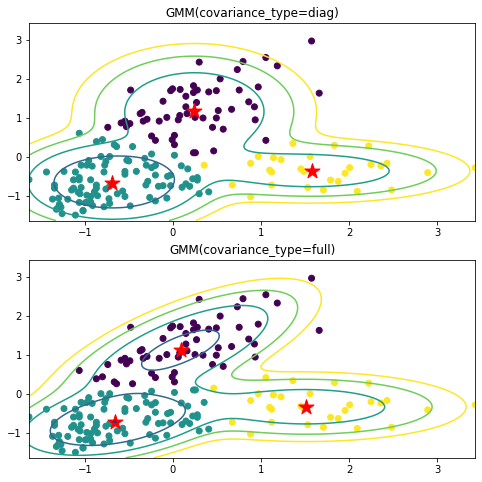

In [16]:
plt.figure(figsize=(8,8)) #プロットのサイズ指定
# 色とプロリンの散布図のGMM(diag)によるクラスタリング
plt.subplot(2, 1, 1)

x = np.linspace(X_std[:,0].min(), X_std[:,0].max(), 100)
y = np.linspace(X_std[:,0].min(), X_std[:,0].max(), 100)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -model.score_samples(XX)
Z = Z.reshape(X.shape)

plt.contour(X, Y, Z, levels=[0.5, 1, 2 ,3 ,4, 5]) # 等高線のプロット
plt.scatter(X_std[:,0], X_std[:,1], c=model.predict(X_std))
plt.scatter(model.means_[:,0], model.means_[:,1],s=250, marker='*',c='red')
plt.title('GMM(covariance_type=diag)')

# 色とプロリンの散布図のGMM(full)によるクラスタリング
plt.subplot(2, 1, 2)

x = np.linspace(X_std[:,0].min(), X_std[:,0].max(), 100)
y = np.linspace(X_std[:,0].min(), X_std[:,0].max(), 100)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -model2.score_samples(XX)
Z = Z.reshape(X.shape)

plt.contour(X, Y, Z, levels=[0.5, 1, 2 ,3 ,4, 5]) # 等高線のプロット
plt.scatter(X_std[:,0], X_std[:,1], c=model2.predict(X_std))
plt.scatter(model2.means_[:,0], model2.means_[:,1],s=250, marker='*',c='red')
plt.title('GMM(covariance_type=full)')

plt.show

In [17]:
model.predict(X_std) #予測

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2])

## 5.5 フルスクラッチコーディング
<a id="1.5"></a>

これまでscikit-learnで実装された機械学習モデルを用いて混合ガウス分布を推定してきた．<br>
本節ではscikit-learnでどのように混合ガウス分布のパラメータを推定しているのかを理解するために、EMアルゴリズムをフルスクラッチで実装を行う．

### 5.5.1 k-means法

まず，EMアルゴリズムの話に入る前に，分類問題でよく利用される教師なし学習手法のk-means法を実装してみよう．<br>
kmeans法では各クラス$C_k$の代表地点$\{\boldsymbol\mu_k\}$を求めることで分類を行うアルゴリズムである．
k-means法のアルゴリズムは以下の通りである．<br>
>1. 各クラスの代表地点$\{\boldsymbol\mu_k\}$を初期化
>2. 各点$x_n$を以下の式を満たすクラス$\hat{k}$に割り当てる
>>$\hat{k}=\mathop{\arg\min}\limits_{k}||\mathbf x_n-\boldsymbol\mu_k||^2$
>3. $\{\boldsymbol\mu_k\}$を以下の式のように更新
>>$\boldsymbol\mu_k=\frac{1}{|C_k|}\sum_{\mathbf x\in C_k} \mathbf x$
>4. (2)，(3)を繰り返し、$\{\boldsymbol\mu_k\}$の更新が止まれば終了


一見難しく感じるかもしれないが，「同じクラスに属するデータ点は似ている」という仮定に基づき，距離の近いデータ点を同じクラスに分類することが主な考え方である．<br>
各クラスは代表地点を持ち，各データ点はどの代表地点に最も近いかという基準に基づいて分類がなされる．<br>
各データ点をそれぞれのクラスに割り振った後に，各クラスに属するデータ点の重心を求めて代表地点の更新を行う．<br>
この作業を一定回数，あるいは分類結果の変化が止まるまで繰り返すことがk-means法のアルゴリズムである．

### 5.5.2 k-means法の実装

では，実際にk-means法の実装を行ってみよう．<br>
基本となるのは，(1)各データ点をどのクラスに分類するのか決定するdist関数と，(2)fit関数内の各クラスの代表地点を決定する部分である．

In [1]:
%matplotlib notebook
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
from matplotlib import animation
class My_KMeans:
    def __init__(self, n_cluster=2, random_state=42,n_iter=300):
        self.n_cluster = n_cluster
        self.n_iter = n_iter
        self.random_state = random_state
        self.is_trained = False
    #各クラスタの中心点を計算
    def fit(self,X):
        
        #結果保存用
        self.centroids_and_labels = []
        self.features = len(X[0])
        
        #代表地点をランダムに選んだデータ点で初期化する
        idx = np.random.choice(len(X), self.n_cluster, replace=False)
        self.centroids = X[idx, :]
        
        #代表地点を基に各データ点にラベル付け
        label = [self.dist(x) for x in X]
        #n_iter回の更新、もしくは分類結果が変わらなくなれば終了
        for n in range(self.n_iter):
            self.labels = label
            
            #分類結果を基に代表地点を更新する（各クラスに属するデータ点の重心を求める）
            self.centroids = np.zeros((self.n_cluster,self.features))
            self.counts = np.zeros((self.n_cluster,1))
            for i,x in enumerate(X):
                self.centroids[self.labels[i]] += x
                self.counts[self.labels[i]] += 1
            self.centroids /= self.counts
            
            #animation描画用に結果を保存しておく
            self.centroids_and_labels.append([deepcopy(self.centroids),deepcopy(self.labels)])
            
            #更新された代表地点を基に再分類
            label=[self.dist(x) for x in X]
            
            #分類結果が変わらなければ終了する
            if label==self.labels:
                break
                
        #学習を終了する
        self.is_trained=True
        
    #与えられた点のクラスタを予測
    def predict(self,X):
        #学習済みでなければ処理をしない
        assert self.is_trained,"fitが実行されていません"
        
        pred=[self.dist(x) for x in X]
        return pred
    
    #各クラスタの中心点との距離を計算し、そのラベルを返す
    def dist(self,x):
        label=-1
        min_distance=float('inf')
        for i in range(self.n_cluster):
            distance=sum((x-self.centroids[i])**2)
            if min_distance>distance:
                label=i
                min_distance=distance
        return label
        

<IPython.core.display.Javascript object>


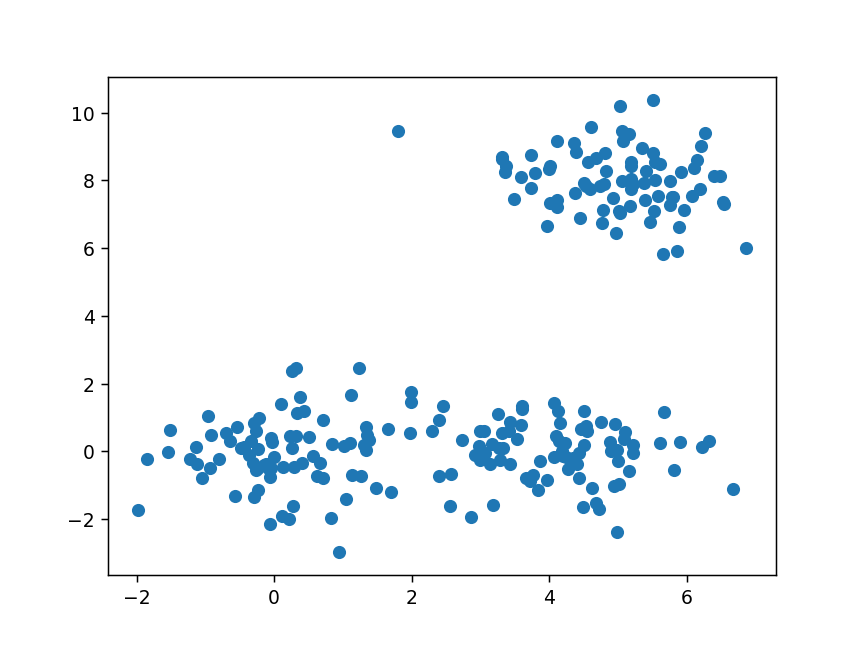

<IPython.core.display.Javascript object>


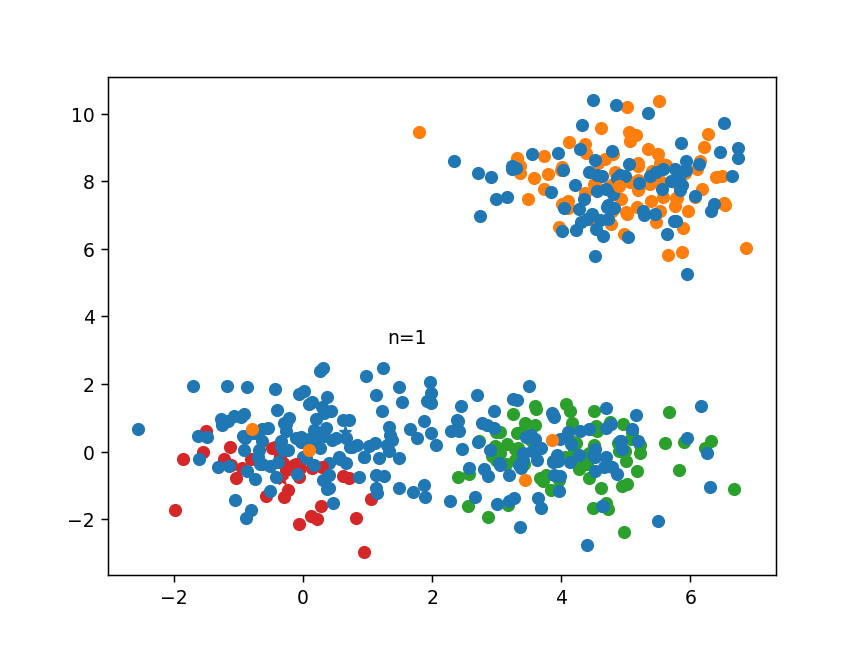

[]

In [4]:
np.random.seed(10)
# テストデータ
X = np.array([[0, 0], [1, 1], [1, 0], [0, 1], [2, 2], [2, 1], [1, 2], [3, 3], [3, 2], [2, 3]])
points1 = np.random.randn(80, 2)
points2 = np.random.randn(80, 2) + np.array([4,0])
points3 = np.random.randn(80, 2) + np.array([5,8])

X = np.r_[points1, points2, points3]
#実行
model = My_KMeans(n_cluster=4,n_iter=20)
model.fit(X)
# 結果を結果をplot
plt.scatter(X[:,0], X[:,1])
plt.show()
colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
fig, ax = plt.subplots()
ims=[]
#結果を可視化可視化(ラベル付き) 
for n,(centroids,label) in enumerate(model.centroids_and_labels):
    u_labels = np.unique(label)
    new=[ax.text(1.3, 3.2,f"n={n}")]
    for i in u_labels:
        new.append(plt.scatter(X[label == i , 0] , X[label == i , 1] ,color=colors[i%10], label = i))
    for i in range(model.n_cluster):
        new.append(plt.scatter(centroids[i][0] , centroids[i][1] ,color=colors[i%10], marker="*"))
    ims.append(new)
ani = animation.ArtistAnimation(fig, ims, interval=500)
plt.plot()

### 5.5.3 混合ガウス分布

混合ガウス分布についておさらいしておこう．<br>
混合ガウス分布は以下の式で表されている．<br>
$$\begin{eqnarray} p(X) = \prod _n \sum_k \pi _k \mathcal{N}\left( x_n |\mu _k , \Sigma _k \right) \end{eqnarray}$$
<br>
混合ガウス分布において決定しなくてはならないパラメータは以下の通りである．
- $\{\mu _k\}$　各ガウス分布の平均<br>
- $ \{\Sigma _k\}$　各ガウス分布の共分散行列<br>
- $\{\pi_ k\}$　ガウス分布の混合比率

### 5.5.4 EMアルゴリズム

EMアルゴリズムはデータから分布のパラメータを推定する有名なアルゴリズムで，混合ガウス分布のパラメータ推定でもよく用いられる．<br>
中身については以下の通りである．<br>

>1. $ \pi , \mu , \Sigma$を初期化する
>2. [Eステップ]以下の式を計算する<br>
>>$ \gamma(z_{nk}) =  \frac{ \pi_k  \mathcal{N} \left( x_n| \mu _k , \Sigma _k \right)}{ \sum_j \pi_j  \mathcal{N} \left( x_n| \mu _j , \Sigma _j \right)   }$<br>
>>$ \\N_k = \sum_n \gamma (z_{nk} )$<br>
>3. [Mステップ]パラメータの更新を行う<br>
>>$L= \sum_n \log \sum_k \pi _k  \mathcal{N} \left( x_n | \mu _k , \Sigma _k \right)$<br>
>>$\mu _k  =  \frac{ \sum_{n} \gamma (z_{nk}) x_n }{N_k}$<br>
>>$ \Sigma _k = \frac{1}{N_k} \sum_n   \gamma (z_{nk} ) (x_n -\mu_k ) (x_n - \mu _k ) ^{T}$<br>
>>$ \pi_ k =\frac{N_k } {N}$
>4. 2，3を収束するまで繰り返す

このアルゴリズムも数式だらけで難しく感じるが，実は先ほど学んだKmeans法と非常に類似したアルゴリズムである．<br>
EMアルゴリズムでは与えられたデータ点がどのガウス分布から生成されたものかを推定している．<br>

### 5.5.5 EMアルゴリズムの実装

In [5]:
%matplotlib notebook
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
from matplotlib import animation
def Gaus(x,mu,S): #正規分布の値を取得
    g = np.exp( -(x-mu)@np.linalg.inv(S)@((x-mu).T)/2 )/np.sqrt((2*np.pi)**len(x) * np.linalg.det(S) )
    return g

#混合ガウスモデル
class my_GMM:
    def __init__(self, n_cluster=3, random_state=42,epsilon=0.1):
        self.n_cluster = n_cluster
        self.epsilon = epsilon
        self.random_state = random_state
        self.is_trained = False
        
    def fit(self,X):
        self.X = X
        
        #パラメータの初期化
        
        #合計が1になるように初期化
        self.pi = np.ones(self.n_cluster)/self.n_cluster
        
        #平均はランダムに選んだデータ点で初期化する
        idx = np.random.choice(len(self.X), self.n_cluster, replace=False)
        self.mu = X[idx, :]
        
        #共分散行列は単位行列にする
        self.S = np.array([np.eye(len(self.X[0])) for _ in range(self.n_cluster)])
        LF=0
        
        #アニメーション描画用
        self.params=[]
        
        for _ in range(300):
            self.params.append([deepcopy(self.pi),deepcopy(self.mu),deepcopy(self.S)])
            
            #Eステップ
            new_LF = self.E_Step()

            #更新量が基準以下になれば終了
            if abs(new_LF-LF)<self.epsilon:
                return 
            LF = new_LF
            #Mステップ
            self.M_Step()
            
    #事後分布の計算(Eステップ)
    def E_Step(self):
        #割引率の計算
        gam = self.pi*np.array([[Gaus(x,self.mu[i],self.S[i]) for i in range (self.n_cluster)] for x in self.X])
        #正規化定数
        nom = np.sum(gam, axis=1).reshape(len(self.X),1)
        gam/= nom
        self.gam = gam
        #誤差関数の計算
        LF = sum(np.log(nom))[0]
        return LF
    
    #パラメーターの更新式（Mステップ）
    def M_Step(self):
        N_k = np.sum(self.gam, axis=0)
        N = np.sum(N_k)
        mu = (self.gam/N_k).T@self.X 
        S =[]
        #各kについてΣを求める
        for k in range(self.n_cluster):
            #データ点について和をとる
            new=np.zeros((len(self.X[0]),(len(self.X[0]))))
            for n in range(len(self.X)):
                #共分散行列
                cov=(self.X[n]-self.mu[k]).reshape(-1, 1)@(self.X[n]-self.mu[k]).reshape(1, -1)
                #重みづけ
                new+=self.gam[n][k]/N_k[k]*cov
            S.append(new)
        S=np.array(S)
        pi = N_k/N
        #パラメータを更新
        self.pi, self.mu, self.S = pi , mu, S
    

In [6]:
np.random.seed(0)
# テストデータ
X = np.array([[0, 0], [1, 1], [1, 0], [0, 1], [2, 2], [2, 1], [1, 2], [3, 3], [3, 2], [2, 3]])
points1 = np.random.randn(80, 2)
points2 = np.random.randn(80, 2) + np.array([4,0])
points3 = np.random.randn(80, 2) + np.array([5,8])

X = np.r_[points1, points2, points3]


In [7]:
model=my_GMM(n_cluster=5)
model.fit(X)

In [8]:
plt.scatter(X[:,0],X[:,1])
plt.scatter(model.mu[:,0],model.mu[:,1])

<IPython.core.display.Javascript object>


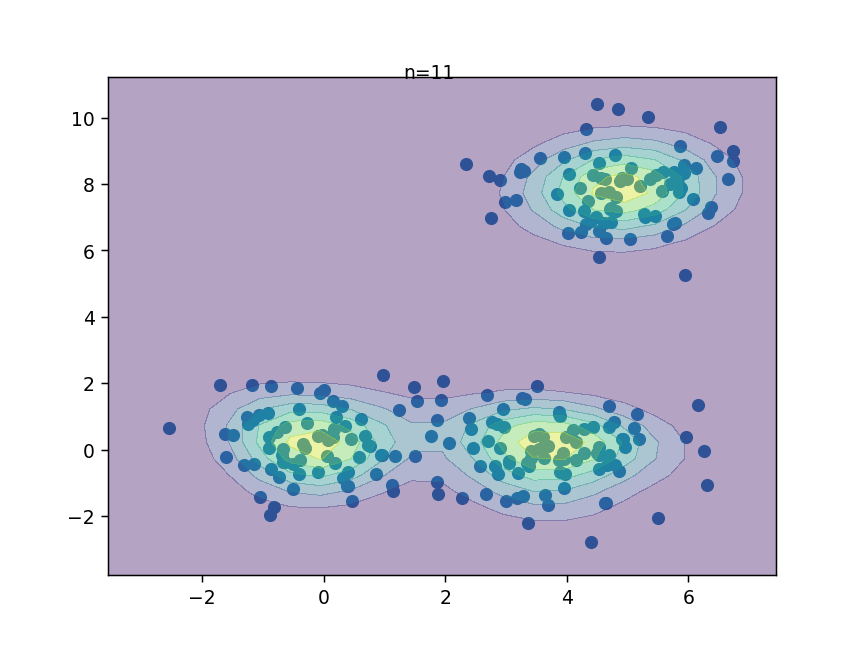

In [9]:
%matplotlib notebook
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
from matplotlib import animation


data=model.X
fig, ax = plt.subplots()
ax.scatter(data[:,0],data[:,1])
#関数に投入するデータを作成
x =  np.arange(min(data[:,0])-1, max(data[:,0])+1, 0.5)
y =  np.arange(min(data[:,1])-1, max(data[:,1])+1, 0.5)
X, Y = np.meshgrid(x, y)
z = np.c_[X.ravel(),Y.ravel()]
ims=[]

for n,params in enumerate(model.params):
    text=[ax.text(1.3, 11.2,f"n={n}")]
    #混合比,平均,共分散行列
    pi,mu,S = params
    #分散共分散行列の行列式
    dets = [np.linalg.det(s) for s in S]
    #分散共分散行列の逆行列
    invs = [np.linalg.inv(s) for s in S]
    #二次元正規分布の確率密度を返す関数
    def gaussian(x):        
        n = x.ndim
        i=0
        p= sum([pi[i]*np.diag(np.exp(-(x - mu[i])@invs[i]@((x - mu[i]).T)/2.0)) / (np.sqrt((2 * np.pi) ** n * dets[i])) for i in range(model.n_cluster)])
        return p
    Z = gaussian(z)
    shape = X.shape
    Z = Z.reshape(shape)
    CS = ax.contourf(x,y, Z, alpha=0.4)
    ims.append(CS.collections+text)
ani = animation.ArtistAnimation(fig, ims, interval=200)
#ani.save('MyGMM.gif', writer='imagemagick')
plt.show()
